<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Weight_Initialization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Why it is important?**

1. Initialize Parameters
2. Choose optimization ALgorithm
3. Repeat these step:
    1. Forward propagate input
    2. Compute cost function
    3. Compute gradient of cost function w.r.t parameters using backpropagation
    4. Update each parameter using gradient, according to optimization algorithm


If parameters(Weights) is not initialized correctly it can cause following **problems:**
- Vanising Gradient
- Exploding Gradient
- Slow Convergence

## **What Not To Do**
1. **Zero Initialization**

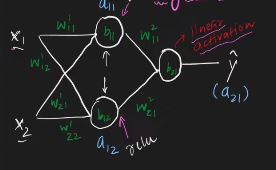

Let's assume this network, We have
- two inputs $$ x_1, x_2 $$
- One hidden layer with two nodes
- In output layer, activation function is linear because we are considering regression problem here.


For once suppose activation function in hidden layer is **ReLu**

So Activation of a_11 will be: $$ a_(11) = max(0,z_(11))$$

Where, $$z_(11) = w^1_(11) x_1 * w^1_(21) x_2 + b_(11)$$

So Activation of a_12 will be: $$ a_(12) = max(0,z_(12))$$

Where, $$z_(12) = w^1_(12) x_1 * w^1_(22) x_2 + b_(12)$$


So,due to zero weights and bais output of both activation functions will be equal and zero. During backpropagation, it's derivative will also be zero. Weights will not be updated.That mean no training will place.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [5]:
df.columns = ['X', 'Y', 'class']

In [6]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


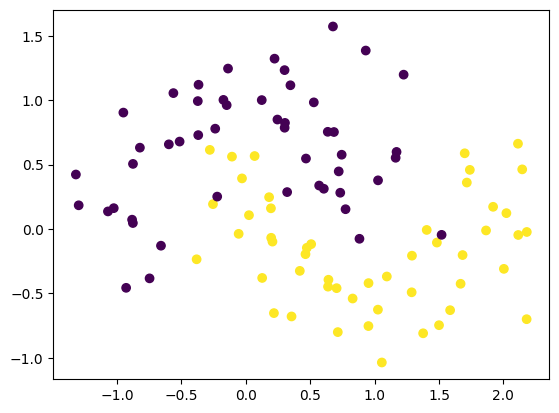

In [7]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Set parameters to 0
model.get_weights()

[array([[-0.6667371 ,  0.6463139 ],
        [-0.29384828, -0.9152915 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.3977271],
        [-1.2205963]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
initial_weights = model.get_weights()

In [30]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [31]:
model.set_weights(initial_weights)

In [32]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 105ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [35]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

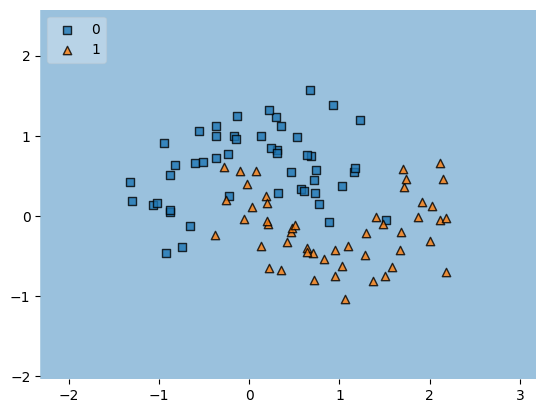

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

2. **Non Zero constant but all weights will be same**

This will behave like linear model, could not capture any non linearity

That's mean

z_11 = z_12

a_11 = a_12

That's mean no matter how many nodes you put in hidden layer they all will behave like a singal node. as their weight and bais are same and input is normalized(so input will not be that much change)

In [37]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Set parameters to 0
model.get_weights()

[array([[ 0.80533373, -0.29360855],
        [ 0.9539231 ,  0.48294497]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.10134625],
        [ 1.2598404 ]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
initial_weights = model.get_weights()

In [40]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [41]:
model.set_weights(initial_weights)

In [42]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [43]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
history = model.fit(X,y,epochs=50,validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 158ms/step - loss: 6.2966 - accuracy: 0.5190 - val_loss: 4.1279 - val_accuracy: 0.6000
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 6.2918 - accuracy: 0.5190 - val_loss: 4.1212 - val_accuracy: 0.6000
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 6.1921 - accuracy: 0.5190 - val_loss: 4.1156 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - 0s 36ms/step - loss: 6.1564 - accuracy: 0.5190 - val_loss: 4.1117 - val_accuracy: 0.6000
Epoch 5/50
3/3 [==============================] - 0s 41ms/step - loss: 6.0557 - accuracy: 0.5190 - val_loss: 4.1072 - val_accuracy: 0.6000
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 6.0121 - accuracy: 0.5190 - val_loss: 4.1032 - val_accuracy: 0.6000
Epoch 7/50
3/3 [==============================] - 0s 30ms/step - loss: 6.0015 - accuracy: 0.5316 - val_loss: 4.1000 - val_accuracy: 0.6000
Epoch 8/50
3/3 [==========

In [45]:
model.get_weights()

[array([[0.533479  , 0.533479  ],
        [0.46836197, 0.46836197]], dtype=float32),
 array([0.47013217, 0.47013217], dtype=float32),
 array([[0.4735542],
        [0.4735542]], dtype=float32),
 array([0.46910077], dtype=float32)]

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

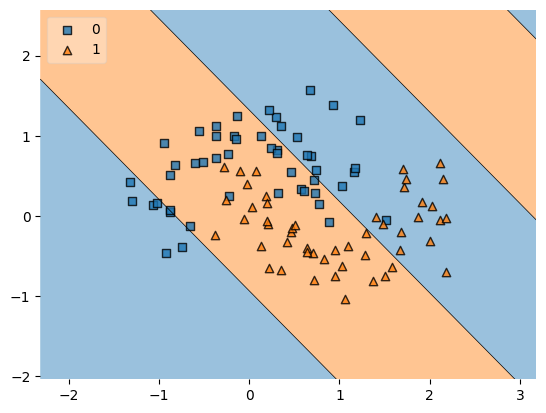

In [46]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

3. **Random weight initilization**
- If weight values intilized is **very small** e.g 0.01. It will make weighted sum of node veryyy small. As our input is normalized. During backpropagation, when we take derivative it will become even smaller. This will lead to **vanishing gradient problem**.

- If large values( between 0 to 1). It will lead to activation function saturation that leads to slow training and in worst case vanishing gradient can be caused.

## **What can be Done?**

1. Heuristic
  1. Xavier/Glorat init
  
   Xavier (also known as Glorot) initialization aims to keep the variance of activations and gradients consistent across layers. It initializes weights from a uniform or normal distribution with a scale factor based on the number of input and output units in the layer. This technique is effective for tanh and sigmoid activation functions.
In Keras, you can use glorot_uniform or glorot_normal as the weight initializer to implement Xavier initialization. 
     
     - Normal

        √1/fan_in

        Where fan_in is the number of inputs for that node
    - Uniform

    [-limit, limit]

    where, limit = √6/(fan_in+fan_out)

  2. He ini
     t   
    He initialization is similar to Xavier/Glorot initialization but uses a different scale factor that accounts for the specific activation function being used. It is more suitable for activation functions like ReLU and its variants, which have a different activation scale compared to tanh and sigmoid.
In Keras, you can use he_uniform or he_normal as the weight initializer to implement He initialization.
      - Normal

        √2/fan_in

    - Uniform

        [-limit, limit]

        where, limit = √6/(fan_in)

If you are working with Tanh or sigmoid you should use Xavier. If working with ReLu, should use He. Both are implemented in Keras.


In [61]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
initial_weights = model.get_weights()

In [63]:
initial_weights[0] = np.random.rand(2,2)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.rand(2,1)*np.sqrt(1/2)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [64]:
model.set_weights(initial_weights)

In [65]:
model.get_weights()

[array([[0.15263155, 0.50098825],
        [0.15190113, 0.5409394 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.5531261 ],
        [0.45080018]], dtype=float32),
 array([0.], dtype=float32)]

In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 110ms/step - loss: 0.7061 - accuracy: 0.4937 - val_loss: 0.6645 - val_accuracy: 0.7000
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7050 - accuracy: 0.5063 - val_loss: 0.6633 - val_accuracy: 0.7000
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7039 - accuracy: 0.5063 - val_loss: 0.6622 - val_accuracy: 0.7000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7028 - accuracy: 0.5190 - val_loss: 0.6610 - val_accuracy: 0.7000
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.7017 - accuracy: 0.5190 - val_loss: 0.6599 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.7007 - accuracy: 0.5316 - val_loss: 0.6588 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6996 - accuracy: 0.5443 - val_loss: 0.6577 - val_accuracy: 0.7000
Epoch 8/100
3/3 [==

In [68]:
model.get_weights()

[array([[ 0.39653534,  0.71536046],
        [-0.15352662,  0.26816443]], dtype=float32),
 array([-0.11161704, -0.04133931], dtype=float32),
 array([[0.8318146 ],
        [0.39143807]], dtype=float32),
 array([-0.08182601], dtype=float32)]

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

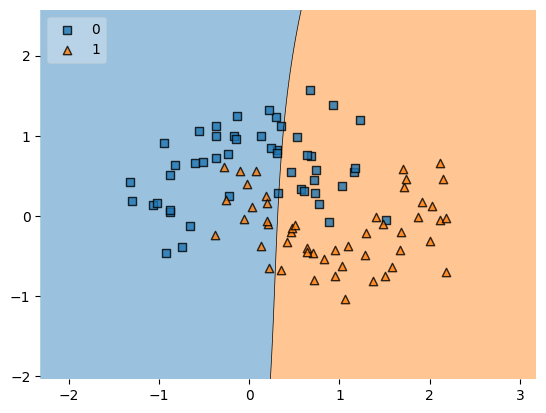

In [69]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)